In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

662

In [6]:
# Import requests dependency to perform API requests and do a version check
import requests
requests.__version__
# Import API key for requests
from config import weather_key
# Build the base url
# url = "https://api.openweathermap.org/data/2.5/weather?units=imperial&lat={lat}&lon={lon}&appid=" + weather_key
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_key

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | rawson
Processing Record 2 of Set 1 | atuona
Processing Record 3 of Set 1 | kodiak
Processing Record 4 of Set 1 | san cristobal
Processing Record 5 of Set 1 | fare
Processing Record 6 of Set 1 | ongandjera
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | puerto ayora
Processing Record 9 of Set 1 | ahipara
Processing Record 10 of Set 1 | cape town
Processing Record 11 of Set 1 | sinnamary
Processing Record 12 of Set 1 | vila velha
Processing Record 13 of Set 1 | san carlos de bariloche
Processing Record 14 of Set 1 | georgetown
Processing Record 15 of Set 1 | mecca
Processing Record 16 of Set 1 | jamestown
Processing Record 17 of Set 1 | tonj
Processing Record 18 of Set 1 | kapaa
Processing Record 19 of Set 1 | hilo
Processing Record 20 of Set 1 | iwanai
Processing Record 21 of Set 1 | karkaralinsk
City not found. Skipping...
Processing Record 22 of Set 1 | castro
Processing R

Processing Record 42 of Set 4 | zakamensk
Processing Record 43 of Set 4 | namatanai
Processing Record 44 of Set 4 | ondorhaan
City not found. Skipping...
Processing Record 45 of Set 4 | mount isa
Processing Record 46 of Set 4 | kahului
Processing Record 47 of Set 4 | dhola
Processing Record 48 of Set 4 | inderborskiy
City not found. Skipping...
Processing Record 49 of Set 4 | pareora
Processing Record 50 of Set 4 | zabid
Processing Record 1 of Set 5 | santa cruz cabralia
Processing Record 2 of Set 5 | lompoc
Processing Record 3 of Set 5 | daru
Processing Record 4 of Set 5 | coquimbo
Processing Record 5 of Set 5 | hervey bay
Processing Record 6 of Set 5 | port-gentil
Processing Record 7 of Set 5 | pangai
Processing Record 8 of Set 5 | zharkovskiy
Processing Record 9 of Set 5 | juneau
Processing Record 10 of Set 5 | foumban
Processing Record 11 of Set 5 | nador
Processing Record 12 of Set 5 | suruc
Processing Record 13 of Set 5 | labuhan
Processing Record 14 of Set 5 | dhidhdhoo
Processi

Processing Record 32 of Set 8 | lata
Processing Record 33 of Set 8 | liyang
Processing Record 34 of Set 8 | la libertad
Processing Record 35 of Set 8 | kamina
Processing Record 36 of Set 8 | normandin
Processing Record 37 of Set 8 | aksu
Processing Record 38 of Set 8 | saint-francois
Processing Record 39 of Set 8 | emerald
Processing Record 40 of Set 8 | doha
Processing Record 41 of Set 8 | hammelburg
Processing Record 42 of Set 8 | esperance
Processing Record 43 of Set 8 | tokur
Processing Record 44 of Set 8 | lacombe
Processing Record 45 of Set 8 | sao filipe
Processing Record 46 of Set 8 | hobyo
Processing Record 47 of Set 8 | santa cruz
Processing Record 48 of Set 8 | musoma
Processing Record 49 of Set 8 | piacabucu
Processing Record 50 of Set 8 | mogilno
Processing Record 1 of Set 9 | olavarria
Processing Record 2 of Set 9 | haines junction
Processing Record 3 of Set 9 | ribeira grande
Processing Record 4 of Set 9 | nouakchott
Processing Record 5 of Set 9 | ngukurr
City not found.

Processing Record 22 of Set 12 | sechura
Processing Record 23 of Set 12 | banda aceh
Processing Record 24 of Set 12 | mersin
Processing Record 25 of Set 12 | toma
Processing Record 26 of Set 12 | oytal
Processing Record 27 of Set 12 | mahibadhoo
Processing Record 28 of Set 12 | dordrecht
Processing Record 29 of Set 12 | liverpool
Processing Record 30 of Set 12 | sayyan
Processing Record 31 of Set 12 | ikwiriri
Processing Record 32 of Set 12 | kostino
Processing Record 33 of Set 12 | sao joao da barra
Processing Record 34 of Set 12 | bloomingdale
Processing Record 35 of Set 12 | henties bay
Processing Record 36 of Set 12 | baft
Processing Record 37 of Set 12 | kloulklubed
Processing Record 38 of Set 12 | terrasini
Processing Record 39 of Set 12 | matara
Processing Record 40 of Set 12 | challans
Processing Record 41 of Set 12 | le port
Processing Record 42 of Set 12 | torbat-e jam
Processing Record 43 of Set 12 | chipinge
Processing Record 44 of Set 12 | sataua
City not found. Skipping..

In [8]:
len(city_data)

618

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)

In [10]:
new_column_order = ['City','Country','Date','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rawson,AR,2022-07-24 17:13:17,-43.3002,-65.1023,42.48,77,100,12.44
1,Atuona,PF,2022-07-24 17:13:18,-9.8000,-139.0333,77.11,66,64,19.15
2,Kodiak,US,2022-07-24 17:12:00,57.7900,-152.4072,54.91,88,100,12.66
3,San Cristobal,VE,2022-07-24 17:08:29,7.7669,-72.2250,78.98,37,96,7.63
4,Fare,PF,2022-07-24 17:13:18,-16.7000,-151.0167,78.96,76,2,12.59
5,Ongandjera,NA,2022-07-24 17:13:19,-17.8833,15.0667,73.36,23,0,5.32
6,Ushuaia,AR,2022-07-24 17:13:19,-54.8000,-68.3000,37.02,64,0,3.44
7,Puerto Ayora,EC,2022-07-24 17:11:29,-0.7393,-90.3518,80.56,86,42,5.99
8,Ahipara,NZ,2022-07-24 17:13:20,-35.1667,173.1667,60.42,94,100,23.85
9,Cape Town,ZA,2022-07-24 17:13:20,-33.9258,18.4232,59.27,68,0,11.01


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

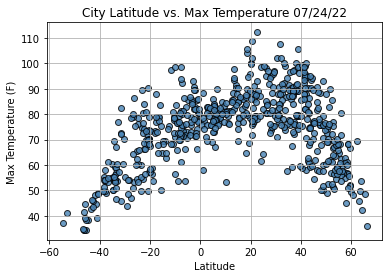

In [13]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities", c="steelblue", facecolor="white")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

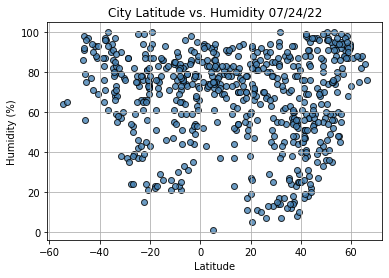

In [14]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities", c="steelblue", facecolor="white")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

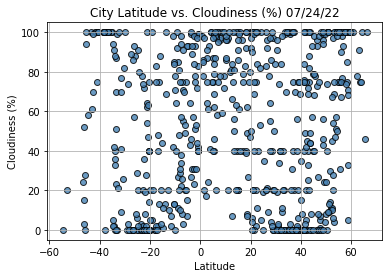

In [15]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities", c="steelblue", facecolor="white")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

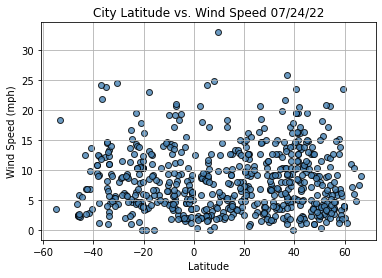

In [16]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities", c="steelblue", facecolor="white")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [17]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values, edgecolor="black",
            linewidths=1, c="darkcyan", facecolor="white")
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
    print(f"The r-value for this plot is {round(r_value,3)}.")

In [18]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

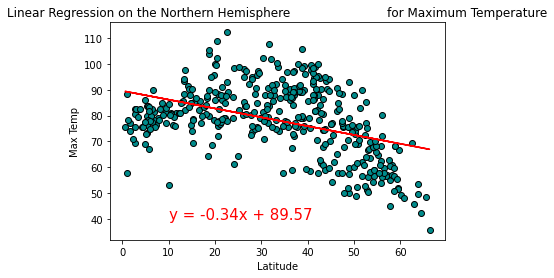

The r-value for this plot is -0.428.


In [19]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

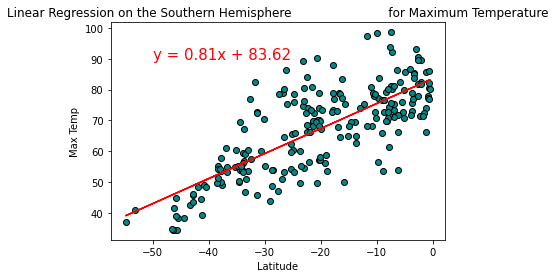

The r-value for this plot is 0.763.


In [20]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

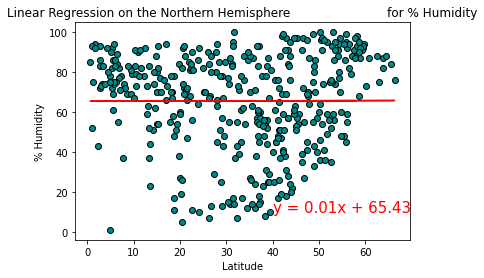

The r-value for this plot is 0.004.


In [21]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

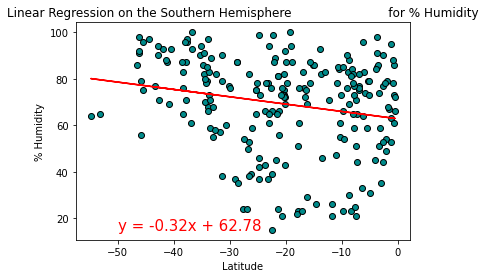

The r-value for this plot is -0.205.


In [22]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

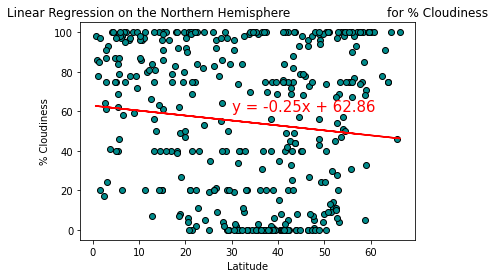

The r-value for this plot is -0.11.


In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(30,60))

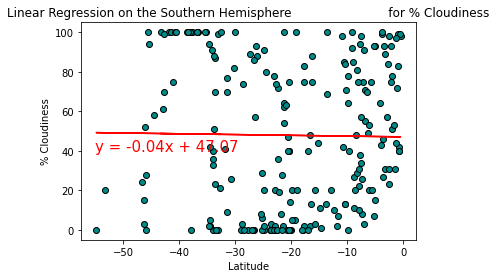

The r-value for this plot is -0.014.


In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-55,40))

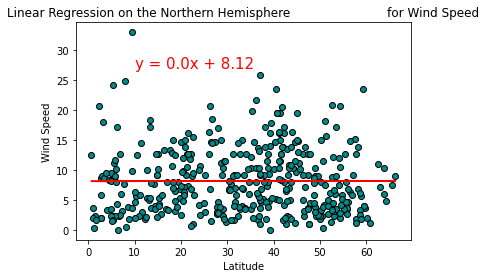

The r-value for this plot is 0.003.


In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(10,27))

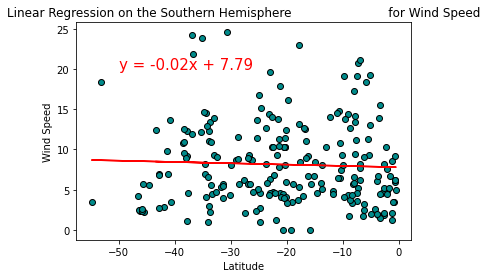

The r-value for this plot is -0.042.


In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,20))